<a href="https://colab.research.google.com/github/nabhonil/kaggle2_Group11/blob/main/Copy_of_M3_Mini_Hackathon_Caltech_256_Image_Classification_initial_code_40_epochs_Baishali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective:
To classify images in the Caltech-256 dataset, which is an improvement over Caltech-101 dataset using a Convolutional Neural Network.

### Problem Statement
To build and implement a Convolutional Neural Network model to classify images in the Caltech-256 dataset.

At the end of this competition, you will be able to:

* Load and extract features of images available in the Caltech-256 dataset using ImageDataGenerator

* Build convolutional neural networks using either Keras or PyTorch deep learning libraries

* Use the pre-trained models using either Keras or PyTorch deep learning libraries

### Description:
Caltech-256 is an object recognition dataset containing approximately 30,000 real-world images, of different sizes, spanning 256 classes (256 object classes and an additional clutter class). Each class is represented by at least 80 images. The dataset is a superset of the Caltech-101 dataset.

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

### Instructions for downloading train and test data are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at https://www.kaggle.com/t/185418aa7ed24db3b98ed851a4db2b41 and click on user then click on your profile as shown below. Click Account.

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP.PNG)



### 2. Next, scroll down to the API access section and click on **Create New Token** to download an API key (kaggle.json).

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP_1.PNG)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [24]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"baishalidsu","key":"1a612212b72768418d7f75449aa25dc9"}'}

In [25]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [26]:
!pip install -U -q kaggle==1.5.8

### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [27]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [28]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [29]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '403 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [30]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c classification-of-caltech-256-images

 99% 312M/316M [00:13<00:00, 18.1MB/s]
100% 316M/316M [00:13<00:00, 24.6MB/s]


In [31]:
!unzip classification-of-caltech-256-images

Streaming output truncated to the last 5000 lines.
  inflating: test/4759.jpg           
  inflating: test/476.jpg            
  inflating: test/4760.jpg           
  inflating: test/4761.jpg           
  inflating: test/4762.jpg           
  inflating: test/4763.jpg           
  inflating: test/4764.jpg           
  inflating: test/4765.jpg           
  inflating: test/4766.jpg           
  inflating: test/4767.jpg           
  inflating: test/4768.jpg           
  inflating: test/4769.jpg           
  inflating: test/477.jpg            
  inflating: test/4770.jpg           
  inflating: test/4771.jpg           
  inflating: test/4772.jpg           
  inflating: test/4773.jpg           
  inflating: test/4774.jpg           
  inflating: test/4775.jpg           
  inflating: test/4776.jpg           
  inflating: test/4777.jpg           
  inflating: test/4778.jpg           
  inflating: test/4779.jpg           
  inflating: test/478.jpg            
  inflating: test/4780.jpg           

### 7. Download the Train Data

In [32]:
%%capture
!wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Caltech_256_Train.zip

!unzip "Caltech_256_Train.zip"

## Grading = 10 Marks

## YOUR CODING STARTS FROM HERE

### Import Required packages

In [33]:
import numpy as np
import pandas as pd
import os,shutil,glob,PIL
import pathlib
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.optim as optim
from tqdm import tqdm

### **Stage 1:** Data Loading and preprocessing of Images (3 points)

#### Analyze the shape of images and distribution of classes

In [34]:
# Normalize with mean and st.dev
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.4839, 0.4528, 0.3962), (0.2702, 0.2655, 0.2745))])

We have to adjust these values with teh correct mean and teh std of the image data

In [35]:
# Loading the train set file
train_data_folder = "/content/Caltech_256_Train" # Train directory for loading images
train_data = datasets.ImageFolder(root=train_data_folder, transform=transform)

In [36]:
# Loading the test set file
test_data_folder = "/content/Kaggle2_Test" # Test directory for loading images
test_data = datasets.ImageFolder(root=test_data_folder, transform=transform)

In [37]:
# Initializing batch size
batch_size = 256

# Loading the train dataset
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [38]:
# Generate a batches of images and labels
train_images, train_labels = next(iter(train_loader))
train_images.shape, train_labels.shape

(torch.Size([256, 3, 224, 224]), torch.Size([256]))

In [39]:
# labels Translator
label_names = {v: k for k, v in train_data.class_to_idx.items()}
label_names

{0: 'Airplanes-101',
 1: 'Ak47',
 2: 'American-Flag',
 3: 'Backpack',
 4: 'Baseball-Bat',
 5: 'Baseball-Glove',
 6: 'Basketball-Hoop',
 7: 'Bat',
 8: 'Bathtub',
 9: 'Bear',
 10: 'Beer-Mug',
 11: 'Billiards',
 12: 'Binoculars',
 13: 'Birdbath',
 14: 'Blimp',
 15: 'Bonsai-101',
 16: 'Boom-Box',
 17: 'Bowling-Ball',
 18: 'Bowling-Pin',
 19: 'Boxing-Glove',
 20: 'Brain-101',
 21: 'Breadmaker',
 22: 'Buddha-101',
 23: 'Bulldozer',
 24: 'Butterfly',
 25: 'Cactus',
 26: 'Cake',
 27: 'Calculator',
 28: 'Camel',
 29: 'Cannon',
 30: 'Canoe',
 31: 'Car-Tire',
 32: 'Cartman',
 33: 'Cd',
 34: 'Centipede',
 35: 'Cereal-Box',
 36: 'Chandelier-101',
 37: 'Chess-Board',
 38: 'Chimp',
 39: 'Chopsticks',
 40: 'Clutter',
 41: 'Cockroach',
 42: 'Coffee-Mug',
 43: 'Coffin',
 44: 'Coin',
 45: 'Comet',
 46: 'Computer-Keyboard',
 47: 'Computer-Monitor',
 48: 'Computer-Mouse',
 49: 'Conch',
 50: 'Cormorant',
 51: 'Covered-Wagon',
 52: 'Cowboy-Hat',
 53: 'Crab-101',
 54: 'Desk-Globe',
 55: 'Diamond-Ring',
 56: '

#### Visualize the sample images of each class


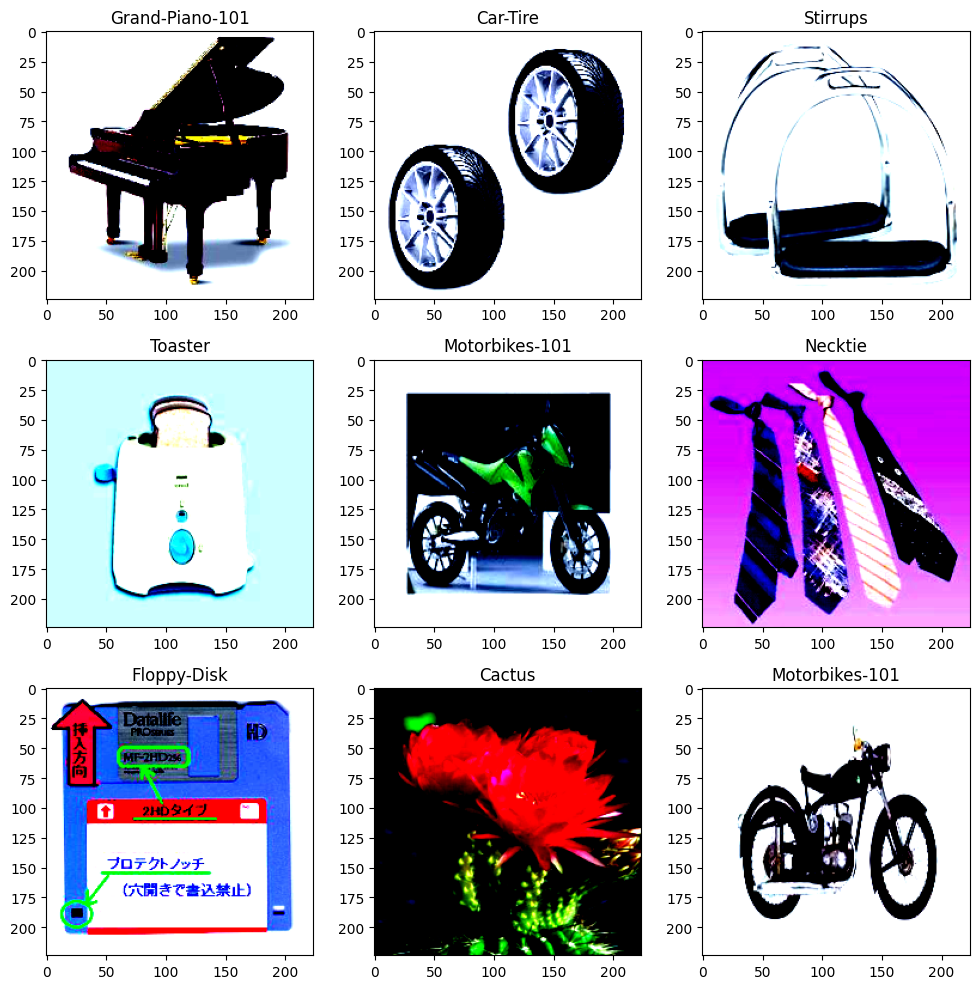

In [40]:
 #Create a grid of images along with their corresponding labels
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (10, 10))
axes = axes.reshape(-1)

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i].permute(1, 2, 0))
    axes[i].set_title(label_names[train_labels[i].item()])
    axes[i].axis('on')

plt.tight_layout()

In [41]:
mean = 0.0
for img, _ in train_data:
    mean += img.mean([1,2])
mean = mean/len(train_data)
print(mean)






tensor([0.2458, 0.2966, 0.3883])


In [42]:
sumel = 0.0
countel = 0
for img, _ in train_data:
    img = (img - mean.unsqueeze(1).unsqueeze(1))**2
    sumel += img.sum([1, 2])
    countel += torch.numel(img[0])
std = torch.sqrt(sumel/countel)
print(std)

tensor([1.1683, 1.1749, 1.1869])


In [43]:
num_classes = len(train_data.classes)
dataset_size = len(train_data)
classes = train_data.classes
img_dict = {}
for i in range(num_classes):
    img_dict[classes[i]] = 0

for i in range(dataset_size):
    img, label = train_data[i]
    img_dict[classes[label]] += 1

img_dict

{'Airplanes-101': 560,
 'Ak47': 67,
 'American-Flag': 67,
 'Backpack': 105,
 'Baseball-Bat': 88,
 'Baseball-Glove': 103,
 'Basketball-Hoop': 59,
 'Bat': 73,
 'Bathtub': 161,
 'Bear': 71,
 'Beer-Mug': 65,
 'Billiards': 194,
 'Binoculars': 151,
 'Birdbath': 67,
 'Blimp': 59,
 'Bonsai-101': 85,
 'Boom-Box': 63,
 'Bowling-Ball': 72,
 'Bowling-Pin': 70,
 'Boxing-Glove': 86,
 'Brain-101': 49,
 'Breadmaker': 98,
 'Buddha-101': 64,
 'Bulldozer': 77,
 'Butterfly': 78,
 'Cactus': 79,
 'Cake': 74,
 'Calculator': 70,
 'Camel': 75,
 'Cannon': 72,
 'Canoe': 71,
 'Car-Tire': 62,
 'Cartman': 68,
 'Cd': 71,
 'Centipede': 68,
 'Cereal-Box': 60,
 'Chandelier-101': 72,
 'Chess-Board': 84,
 'Chimp': 76,
 'Chopsticks': 59,
 'Clutter': 578,
 'Cockroach': 84,
 'Coffee-Mug': 60,
 'Coffin': 60,
 'Coin': 85,
 'Comet': 70,
 'Computer-Keyboard': 58,
 'Computer-Monitor': 93,
 'Computer-Mouse': 65,
 'Conch': 72,
 'Cormorant': 74,
 'Covered-Wagon': 67,
 'Cowboy-Hat': 79,
 'Crab-101': 57,
 'Desk-Globe': 57,
 'Diamond-

For all those classes , whereever minority is there, all the minority classes needs to go for augmenting new samples.

In [ ]:
# No of classes
len(train_data.classes)

256

In [ ]:
len(train_data)

21008

In [44]:
# size of one training image
train_data[0][0].size()

torch.Size([3, 224, 224])

In [ ]:
max(img_dict,key=img_dict.get)

'Clutter'

In [45]:
total = sum(img_dict.values())
answer = {k: v/total for k,v in img_dict.items()}
answer

{'Airplanes-101': 0.026656511805026657,
 'Ak47': 0.003189261233815689,
 'American-Flag': 0.003189261233815689,
 'Backpack': 0.004998095963442498,
 'Baseball-Bat': 0.004188880426504189,
 'Baseball-Glove': 0.004902894135567403,
 'Basketball-Hoop': 0.0028084539223153086,
 'Bat': 0.0034748667174409748,
 'Bathtub': 0.007663747143945163,
 'Bear': 0.00337966488956588,
 'Beer-Mug': 0.003094059405940594,
 'Billiards': 0.009234577303884235,
 'Binoculars': 0.0071877380045696874,
 'Birdbath': 0.003189261233815689,
 'Blimp': 0.0028084539223153086,
 'Bonsai-101': 0.004046077684691546,
 'Boom-Box': 0.002998857578065499,
 'Bowling-Ball': 0.003427265803503427,
 'Bowling-Pin': 0.003332063975628332,
 'Boxing-Glove': 0.004093678598629094,
 'Brain-101': 0.0023324447829398322,
 'Breadmaker': 0.0046648895658796645,
 'Buddha-101': 0.0030464584920030465,
 'Bulldozer': 0.0036652703731911655,
 'Butterfly': 0.0037128712871287127,
 'Cactus': 0.0037604722010662604,
 'Cake': 0.0035224676313785224,
 'Calculator': 0.0

In [46]:
# To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 2.0.1+cu118 CUDA: True


In [47]:
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

In [48]:
model_ft = models.googlenet(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs,num_classes)
#model.softmax-nn.softmax
model_ft = model_ft.to(device)
print(model_ft)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 118MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ft.parameters(), lr=0.001)

In [50]:
train_accu = []     # Empty list for saving train accuracy
train_losses = []   # Empty list for saving train losses
def train(epoch):
  print('\nEpoch : %d'%epoch)

  model_ft.train()    # Initiate the model in training mode

  running_loss = 0
  correct = 0
  total = 0

  for data in tqdm(train_loader):

    inputs,labels=data[0].to(device),data[1].to(device)   # Loading the input tensors into CUDA GPU

    optimizer.zero_grad()
    outputs = model_ft(inputs)
    loss = criterion(outputs,labels)  # Calculating the loss
    loss.backward()                   # Back Propagation for calculaing gradients and adjusting weights
    optimizer.step()

    running_loss += loss.item()

    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()


  train_loss = running_loss/len(train_loader)     # Calculating the mean of training loss
  accu = 100.*correct/total                       # Calculating the accuracy

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

hyperparameter=epoch,learning rate

In [51]:
epochs = 40
for epoch in range(1, epochs+1):
    train(epoch)


Epoch : 1


100%|██████████| 83/83 [03:20<00:00,  2.41s/it]


Train Loss: 2.493 | Accuracy: 49.910

Epoch : 2


100%|██████████| 83/83 [03:18<00:00,  2.39s/it]


Train Loss: 0.899 | Accuracy: 78.513

Epoch : 3


100%|██████████| 83/83 [03:14<00:00,  2.34s/it]


Train Loss: 0.523 | Accuracy: 87.143

Epoch : 4


100%|██████████| 83/83 [03:15<00:00,  2.36s/it]


Train Loss: 0.328 | Accuracy: 91.789

Epoch : 5


100%|██████████| 83/83 [03:15<00:00,  2.36s/it]


Train Loss: 0.143 | Accuracy: 96.539

Epoch : 6


100%|██████████| 83/83 [03:24<00:00,  2.47s/it]


Train Loss: 0.114 | Accuracy: 97.496

Epoch : 7


100%|██████████| 83/83 [03:25<00:00,  2.47s/it]


Train Loss: 0.185 | Accuracy: 95.188

Epoch : 8


100%|██████████| 83/83 [03:19<00:00,  2.40s/it]


Train Loss: 0.089 | Accuracy: 98.001

Epoch : 9


100%|██████████| 83/83 [03:17<00:00,  2.38s/it]


Train Loss: 0.162 | Accuracy: 95.863

Epoch : 10


100%|██████████| 83/83 [03:16<00:00,  2.37s/it]


Train Loss: 0.212 | Accuracy: 94.207

Epoch : 11


100%|██████████| 83/83 [03:14<00:00,  2.35s/it]


Train Loss: 0.215 | Accuracy: 93.931

Epoch : 12


100%|██████████| 83/83 [03:13<00:00,  2.33s/it]


Train Loss: 0.130 | Accuracy: 96.401

Epoch : 13


100%|██████████| 83/83 [03:16<00:00,  2.37s/it]


Train Loss: 0.074 | Accuracy: 98.244

Epoch : 14


100%|██████████| 83/83 [03:14<00:00,  2.35s/it]


Train Loss: 0.071 | Accuracy: 98.353

Epoch : 15


100%|██████████| 83/83 [03:14<00:00,  2.34s/it]


Train Loss: 0.045 | Accuracy: 98.910

Epoch : 16


100%|██████████| 83/83 [03:14<00:00,  2.34s/it]


Train Loss: 0.086 | Accuracy: 97.858

Epoch : 17


100%|██████████| 83/83 [03:12<00:00,  2.32s/it]


Train Loss: 0.214 | Accuracy: 94.136

Epoch : 18


100%|██████████| 83/83 [03:14<00:00,  2.34s/it]


Train Loss: 0.150 | Accuracy: 95.835

Epoch : 19


100%|██████████| 83/83 [03:13<00:00,  2.33s/it]


Train Loss: 0.052 | Accuracy: 98.681

Epoch : 20


100%|██████████| 83/83 [03:14<00:00,  2.34s/it]


Train Loss: 0.138 | Accuracy: 96.325

Epoch : 21


100%|██████████| 83/83 [03:15<00:00,  2.35s/it]


Train Loss: 0.102 | Accuracy: 97.220

Epoch : 22


100%|██████████| 83/83 [03:11<00:00,  2.31s/it]


Train Loss: 0.083 | Accuracy: 97.791

Epoch : 23


100%|██████████| 83/83 [03:14<00:00,  2.34s/it]


Train Loss: 0.029 | Accuracy: 99.305

Epoch : 24


100%|██████████| 83/83 [03:12<00:00,  2.32s/it]


Train Loss: 0.026 | Accuracy: 99.338

Epoch : 25


100%|██████████| 83/83 [03:14<00:00,  2.34s/it]


Train Loss: 0.016 | Accuracy: 99.714

Epoch : 26


100%|██████████| 83/83 [03:13<00:00,  2.33s/it]


Train Loss: 0.040 | Accuracy: 99.038

Epoch : 27


100%|██████████| 83/83 [03:14<00:00,  2.34s/it]


Train Loss: 0.117 | Accuracy: 96.777

Epoch : 28


100%|██████████| 83/83 [03:13<00:00,  2.33s/it]


Train Loss: 0.171 | Accuracy: 95.359

Epoch : 29


100%|██████████| 83/83 [03:14<00:00,  2.35s/it]


Train Loss: 0.111 | Accuracy: 96.854

Epoch : 30


100%|██████████| 83/83 [03:18<00:00,  2.39s/it]


Train Loss: 0.068 | Accuracy: 98.229

Epoch : 31


100%|██████████| 83/83 [03:14<00:00,  2.35s/it]


Train Loss: 0.051 | Accuracy: 98.696

Epoch : 32


100%|██████████| 83/83 [03:15<00:00,  2.35s/it]


Train Loss: 0.041 | Accuracy: 98.962

Epoch : 33


100%|██████████| 83/83 [03:18<00:00,  2.39s/it]


Train Loss: 0.067 | Accuracy: 98.196

Epoch : 34


100%|██████████| 83/83 [03:14<00:00,  2.34s/it]


Train Loss: 0.162 | Accuracy: 95.683

Epoch : 35


100%|██████████| 83/83 [03:13<00:00,  2.33s/it]


Train Loss: 0.126 | Accuracy: 96.425

Epoch : 36


100%|██████████| 83/83 [03:13<00:00,  2.33s/it]


Train Loss: 0.037 | Accuracy: 98.872

Epoch : 37


100%|██████████| 83/83 [03:13<00:00,  2.33s/it]


Train Loss: 0.013 | Accuracy: 99.710

Epoch : 38


100%|██████████| 83/83 [03:15<00:00,  2.35s/it]


Train Loss: 0.025 | Accuracy: 99.457

Epoch : 39


100%|██████████| 83/83 [03:24<00:00,  2.46s/it]


Train Loss: 0.154 | Accuracy: 95.759

Epoch : 40


100%|██████████| 83/83 [03:15<00:00,  2.36s/it]

Train Loss: 0.068 | Accuracy: 98.010


In [53]:
PATH = '/content/Caltech_256-GoogleNet.pth'
torch.save(model_ft.state_dict(), PATH)

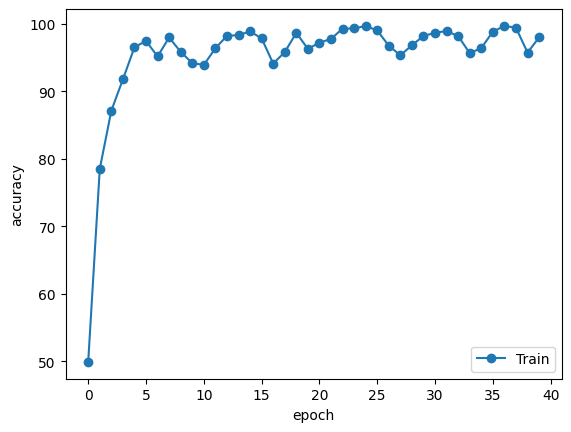

In [54]:
plt.plot(train_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train'])
plt.show()

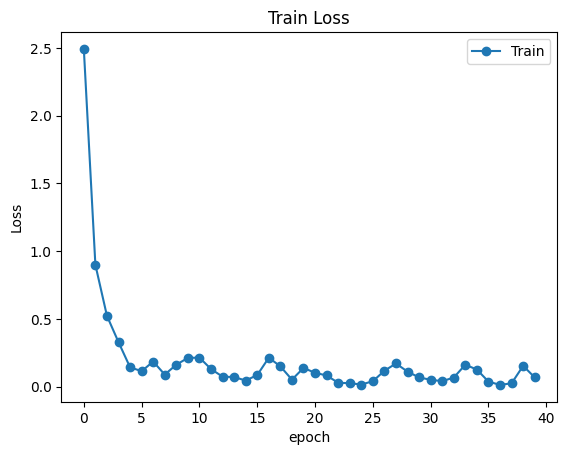

In [55]:
plt.plot(train_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.title('Train Loss')
plt.show()

In [56]:
model_ft.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [57]:
# Loading the train dataset
test_batch_size = 1
test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_batch_size)

In [58]:
predictions = []
for i,data in enumerate(test_loader):
  input,_ = data
  output = model_ft(input.to(device))
  # print(output)
  pred = torch.max(output,dim=1)
  # print(pred)
  predictions.append(train_data.classes[pred.indices])


In [59]:
results = pd.DataFrame()
results['img_path'] = pd.Series([x[0].split("/",3)[3] for x in list(test_loader.dataset.imgs)])
results['label'] = pd.Series(predictions)

In [60]:
results.to_csv("trial_1_submission.csv")
results.head(5)

,img_path,label
0,test/1.jpg,Watch-101
1,test/10.jpg,Watch-101
2,test/100.jpg,American-Flag
3,test/1000.jpg,Toad
4,test/1001.jpg,Toad


### **Stage 2:** Build and train the CNN model using Keras/Pytorch (5 points)

You can train the CNN model and Pre-trained model and then compare the model performance on the kaggle testset


### Transfer learning

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.



#### Use the pre-trained models

* Load the pre-trained model
* Train and evaluate the images

In [ ]:
# YOUR CODE HERE

###   **Stage 3**: Evaluate the Model and get model predictions on the Kaggle testset (2 Points)









In [ ]:
# YOUR CODE HERE

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Plot the confusion matrix in terms of the misclassifications